# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [5]:
# TODO: view the shape of your data
print(transactions.shape)

(1000000, 10)


In [20]:
# TODO: Begin your EDA
transactions.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,1.796208e+05,8.351184e+05,8.565104e+05,1.102856e+06,1.227859e+06,0.001297,0.000001
std,6.076181e+05,2.892918e+06,2.928896e+06,3.464915e+06,3.752688e+06,0.035991,0.001000
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.336939e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,7.443500e+04,1.411000e+04,0.000000e+00,1.331849e+05,2.148652e+05,0.000000,0.000000
75%,2.083404e+05,1.073804e+05,1.446566e+05,9.430209e+05,1.110702e+06,0.000000,0.000000
max,9.244552e+07,3.958504e+07,3.893942e+07,3.555534e+08,3.560159e+08,1.000000,1.000000


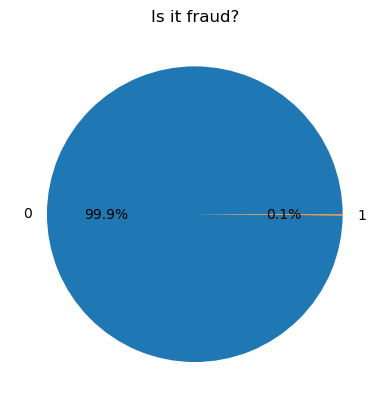

In [21]:
transactions['isFraud'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Is it fraud?')
plt.show()

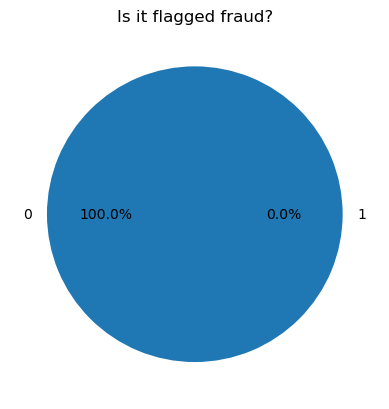

In [17]:
transactions['isFlaggedFraud'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Is it flagged fraud?')
plt.show()

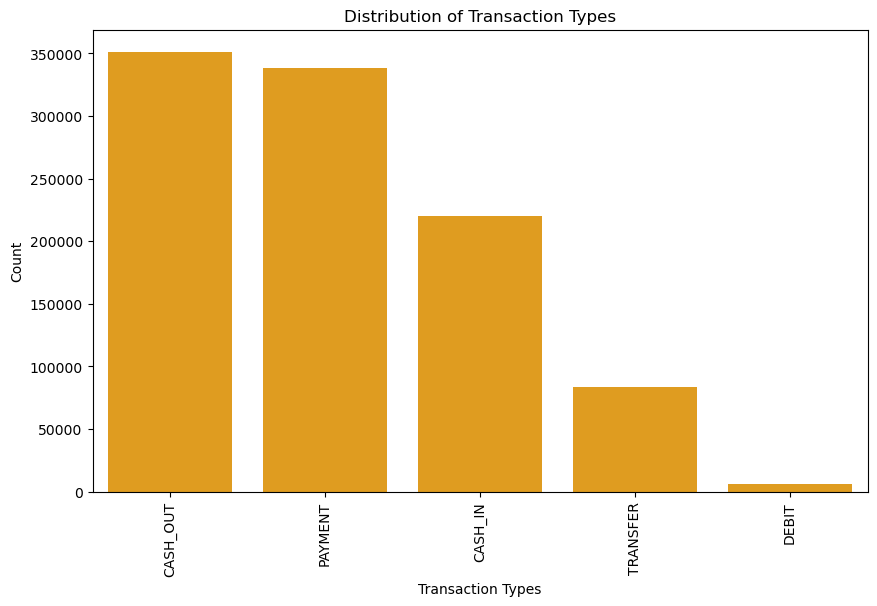

In [45]:
transaction_numbers = transactions["type"].value_counts()
transaction_types = transactions["type"].value_counts().index

plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_types, y=transaction_numbers, color="orange")
plt.xticks(rotation=90)
plt.xlabel("Transaction Types")
plt.ylabel("Count")
plt.title("Distribution of Transaction Types")
plt.show()

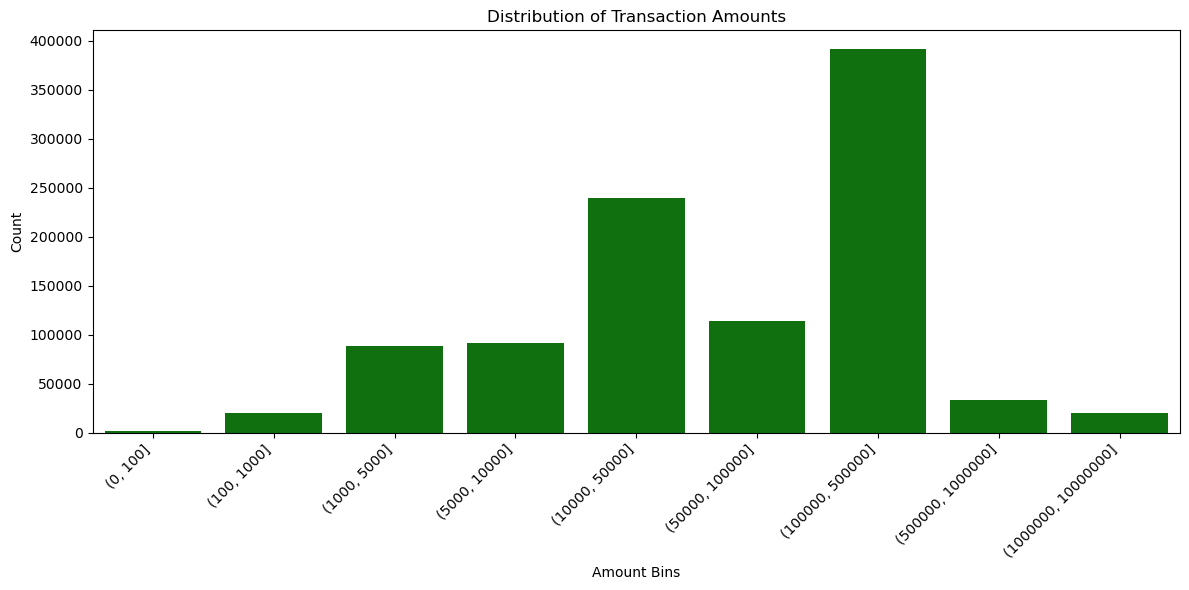

In [43]:
bins = [0, 100, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 10000000]
bin_amount = pd.cut(transactions["amount"], bins=bins)
bin_counts = binned_amount.value_counts().sort_index()
bin_labels = bin_counts.index.astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(x=bin_labels, y=bin_counts.values, color="green")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Amount Bins")
plt.ylabel("Count")
plt.title("Distribution of Transaction Amounts")
plt.tight_layout()
plt.show()

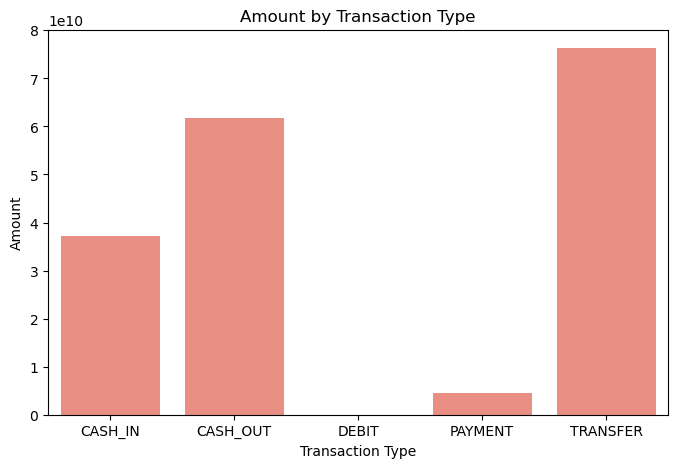

In [51]:
amount_by_type = transactions.groupby('type')['amount'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='type', y='amount', data=amount_by_type, color='salmon')
plt.title('Amount by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.show()

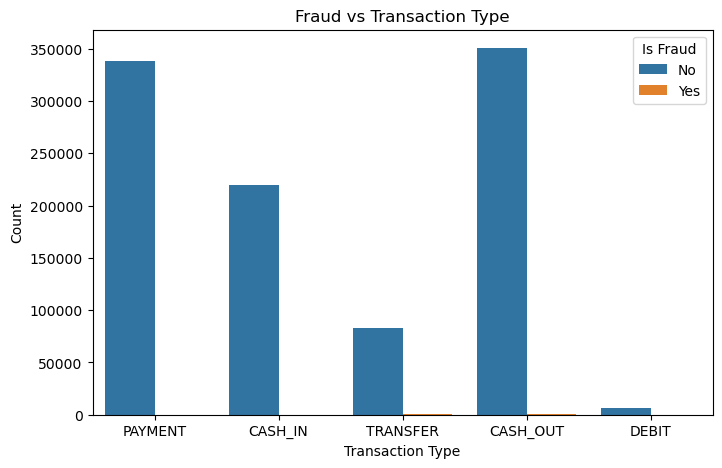

In [53]:
plt.figure(figsize=(8, 5))
sns.countplot(x='type', hue='isFraud', data=transactions)
plt.title('Fraud vs Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.show()

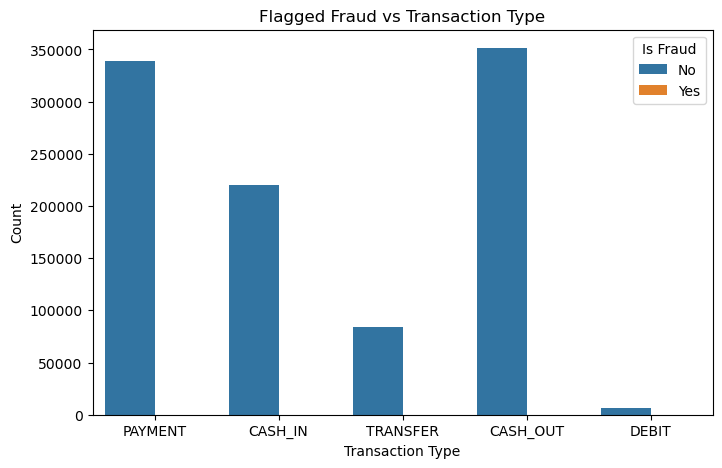

In [54]:
plt.figure(figsize=(8, 5))
sns.countplot(x='type', hue='isFlaggedFraud', data=transactions)
plt.title('Flagged Fraud vs Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.show()

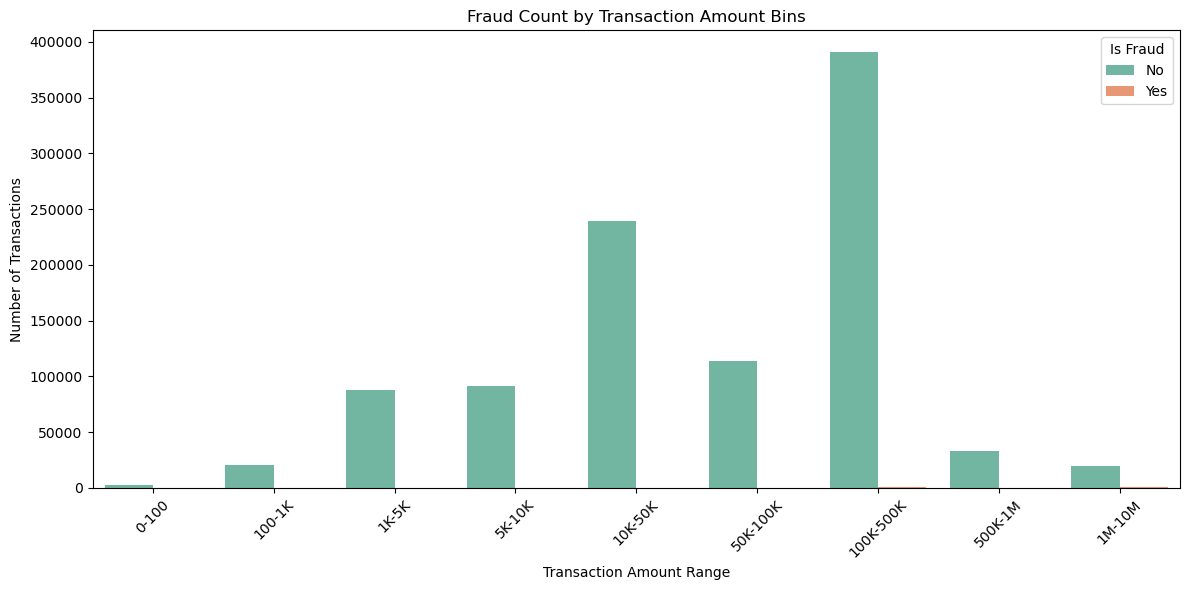

In [3]:
bins = [0, 100, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 10000000]
bin_labels = ['0-100', '100-1K', '1K-5K', '5K-10K', '10K-50K', '50K-100K', '100K-500K', '500K-1M', '1M-10M']

transactions['amount_bin'] = pd.cut(transactions['amount'], bins=bins, labels=bin_labels, include_lowest=True)

plt.figure(figsize=(12, 6))
sns.countplot(x='amount_bin', hue='isFraud', data=transactions, palette='Set2')
plt.title('Fraud Count by Transaction Amount Bins')
plt.xlabel('Transaction Amount Range')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

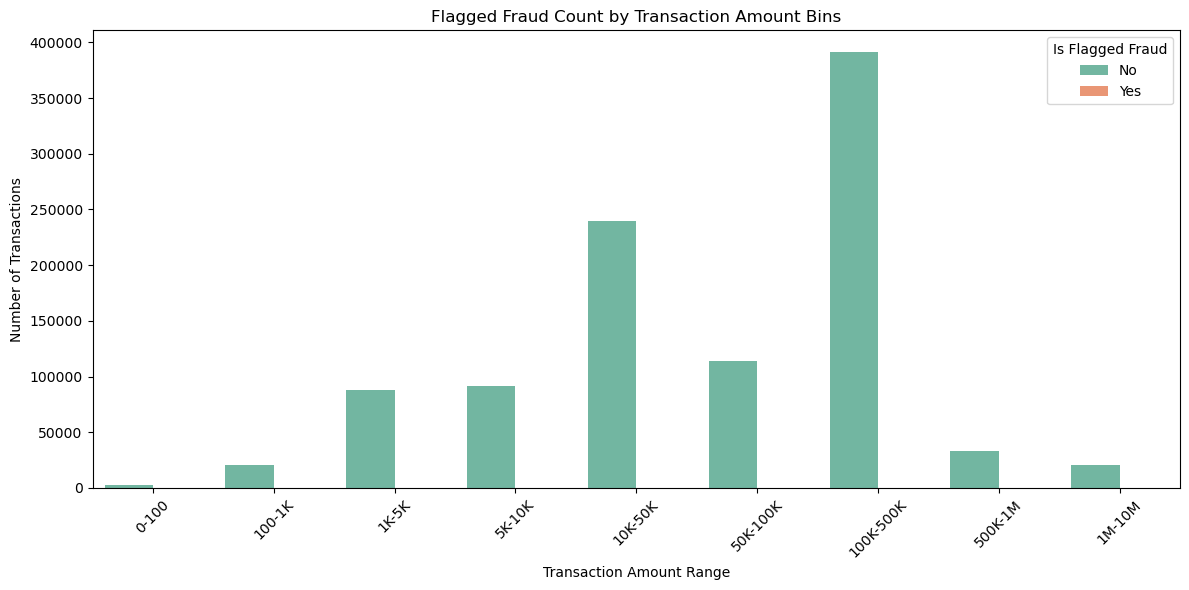

In [5]:
bins = [0, 100, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 10000000]
bin_labels = ['0-100', '100-1K', '1K-5K', '5K-10K', '10K-50K', '50K-100K', '100K-500K', '500K-1M', '1M-10M']

transactions['amount_bin'] = pd.cut(transactions['amount'], bins=bins, labels=bin_labels, include_lowest=True)

plt.figure(figsize=(12, 6))
sns.countplot(x='amount_bin', hue='isFlaggedFraud', data=transactions, palette='Set2')
plt.title('Flagged Fraud Count by Transaction Amount Bins')
plt.xlabel('Transaction Amount Range')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Flagged Fraud', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='amount', ylabel='newbalanceOrig'>

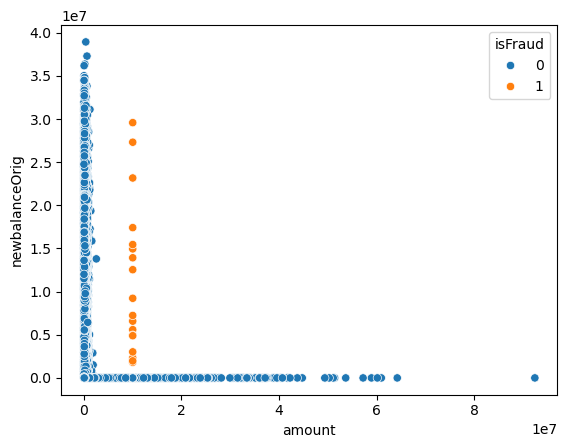

In [17]:
sns.scatterplot(data=transactions, x = "amount", y = "newbalanceOrig", hue = "isFraud")

<Axes: xlabel='amount', ylabel='oldbalanceOrg'>

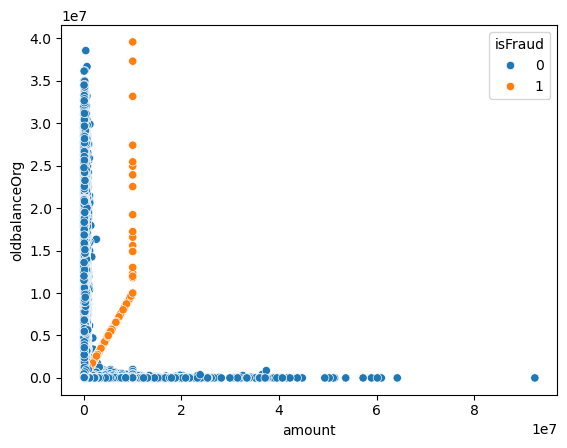

In [34]:
sns.scatterplot(data=transactions, x = "amount", y = "oldbalanceOrg", hue = "isFraud")

<Axes: xlabel='oldbalanceOrg', ylabel='oldbalanceDest'>

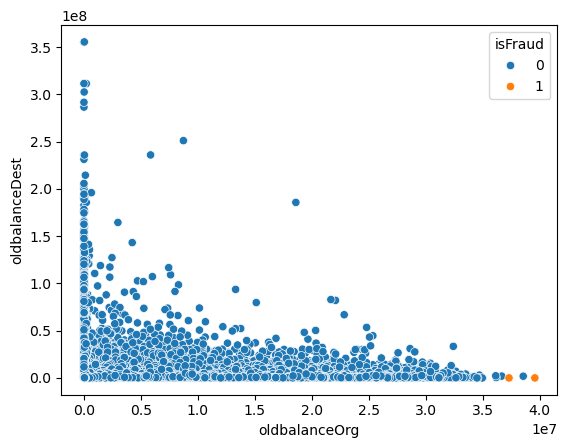

In [35]:
sns.scatterplot(data=transactions, x = "oldbalanceOrg", y = "oldbalanceDest", hue = "isFraud")

<Axes: xlabel='newbalanceOrig', ylabel='newbalanceDest'>

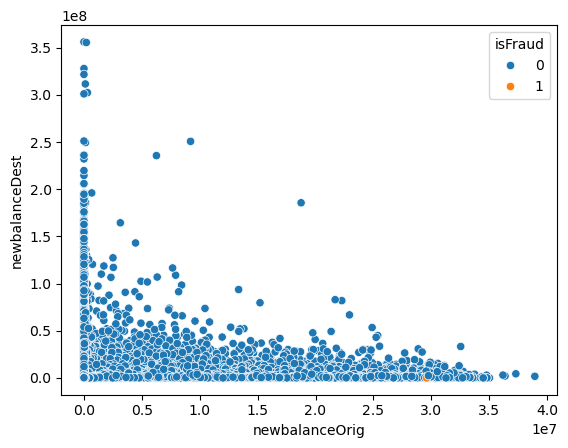

In [36]:
sns.scatterplot(data=transactions, x = "newbalanceOrig", y = "newbalanceDest", hue = "isFraud")

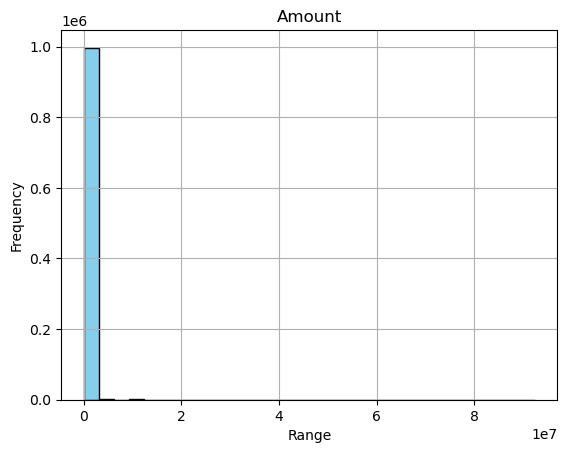

In [33]:
transactions['amount'].hist(bins=30, color='skyblue', edgecolor='black')

plt.title('Amount')
plt.xlabel('Range')
plt.ylabel('Frequency')

plt.show()

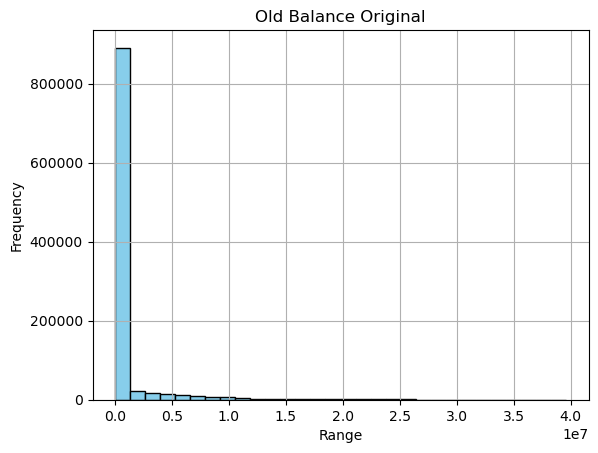

In [32]:
transactions['oldbalanceOrg'].hist(bins=30, color='skyblue', edgecolor='black')

plt.title('Old Balance Original')
plt.xlabel('Range')
plt.ylabel('Frequency')

plt.show()

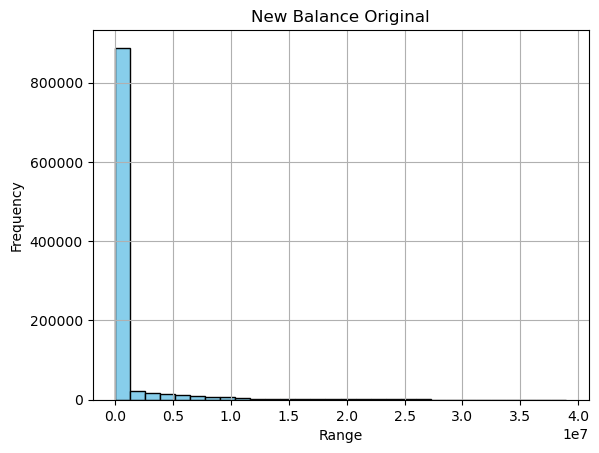

In [31]:
transactions['newbalanceOrig'].hist(bins=30, color='skyblue', edgecolor='black')

plt.title('New Balance Original')
plt.xlabel('Range')
plt.ylabel('Frequency')

plt.show()

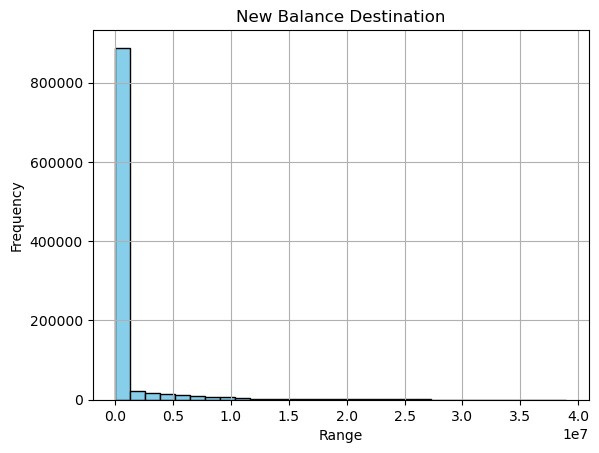

In [29]:
transactions['newbalanceOrig'].hist(bins=30, color='skyblue', edgecolor='black')

plt.title('New Balance Destination')
plt.xlabel('Range')
plt.ylabel('Frequency')

plt.show()

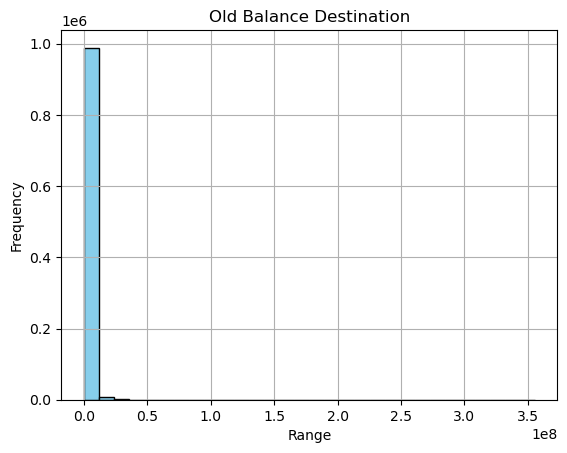

In [28]:
transactions['oldbalanceDest'].hist(bins=30, color='skyblue', edgecolor='black')

plt.title('Old Balance Destination')
plt.xlabel('Range')
plt.ylabel('Frequency')

plt.show()

In [13]:
pivot = transactions.pivot_table(index='type', columns='isFraud', values='amount', aggfunc='mean')
pivot.columns = ['Non-Fraud', 'Fraud']
print(pivot)


              Non-Fraud         Fraud
type                                 
CASH_IN   168928.914668           NaN
CASH_OUT  173427.674988  1.326971e+06
DEBIT       5445.890813           NaN
PAYMENT    13055.592085           NaN
TRANSFER  908187.358989  1.384176e+06


In [37]:
pivot = transactions.pivot_table(index='type', columns='isFlaggedFraud', values='amount', aggfunc='mean')
pivot.columns = ['Non-FlaggedFraud', 'FlaggedFraud']
print(pivot)

          Non-FlaggedFraud  FlaggedFraud
type                                    
CASH_IN      168928.914668           NaN
CASH_OUT     175584.659320           NaN
DEBIT          5445.890813           NaN
PAYMENT       13055.592085           NaN
TRANSFER     911831.638209     536624.41


In [14]:
pd.crosstab(transactions['isFlaggedFraud'], transactions['isFraud'], margins=True)


isFraud,0,1,All
isFlaggedFraud,,,
0,998703,1296,999999
1,0,1,1
All,998703,1297,1000000


In [15]:
TP = len(transactions[(transactions['isFraud'] == 1) & (transactions['isFlaggedFraud'] == 1)])
FN = len(transactions[(transactions['isFraud'] == 1) & (transactions['isFlaggedFraud'] == 0)])
TN = len(transactions[(transactions['isFraud'] == 0) & (transactions['isFlaggedFraud'] == 0)])
FP = len(transactions[(transactions['isFraud'] == 0) & (transactions['isFlaggedFraud'] == 1)])

print(f"True Positives: {TP}")
print(f"False Negatives: {FN}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")

True Positives: 1
False Negatives: 1296
True Negatives: 998703
False Positives: 0


In [16]:
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 1.0000
Recall: 0.0008


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

The amount of transaction money is highest within the 100,000 to 500,000 range.
Also, the histograms follow a similar pattern in terms of range, it is heavily right skewed.


### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

In the scatterplot comparing amount and newbalanceOrig, there's a line forming marked as fraud around the 1 in the amount axis. It tells us the fraudulent cases differ by amount. In another scatterplot comparing oldbalanceOrg and oldbalanceDest, the fraudulent cases appear when original account is high. It looks like the high bank accounts which are mostly the oldbalanceOrig are being transferred to oldbalanceDest where the bank accounts are mostly zero dollar amount.






### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

Cash Out and Payments are the top two transaction types by count. Transfer and Cash Out have the highest amount of money by count. The smaller transaction types are Debit and Transfer.

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.


Fraudulent transfers often have average amounts several times higher than non-fraudulent transfers. Cash Out fraud tends to involve higher average transaction values.




## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Cash Out and Transfer are flagged as fraud in the pivot table for fraud transactions. Meanwhile, Transfer is flagged as flaggedfraud in the pivot table for flaggedfraud transactions. They both have Transfer as being flagged for fraud. The system's current performance is very conservative, it prioritizes avoiding customer disruption over catching fraud. Improving fraud catching without much customer disruption would help the conservative, it prioritizes avoiding customer disruption over catching fraud would help the systems' performance.